## Introdução à Aprendizagem Profunda
**LISTA PRÁTICA DAS UNIDADES 1 E 2**
- Discente: Vitor Negromonte (vnco)
- Período: 2023.2

## Instruções e requisitos

- Pode ser feita com o grupo do projeto. Recomendo pair/group programming para que todos vejam um pouco de todas as partes.

- Treine e avalie 4 modelos de classificação para a base de dados do FashionMNIST (https://www.kaggle.com/datasets/zalando-research/fashionmnist,
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html).


1.   Um modelo base que não seja uma rede neural, como _decision tree, xgboost, random forest_, etc. Recomendação: use o sklearn (https://scikit-learn.org/).

2.   Uma MLP

3. Uma rede convolucional criada por ti. Recomendação: https://pytorch.org/

4. Use um modelo pré treinado já consolidado na literatura para fazer _transfer learning_. Recomendações: https://pytorch.org/hub/pytorch_vision_vgg/


Compare os resultados dos modelos:
* plote gráficos que mostrem as acurácias de cada modelo
* Indique qual foi a classe na qual o modelo teve pior performance (indique qual métrica usou para concluir isso e faça para cada modelo)
* argumente qual o melhor modelo levando em consideração o tempo de execução e acurácia.

Recomendação use:
https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html .

Recomendação:

Faça um template de treino, validação e teste que funcione para uma API de modelo.

Crie a API para cada modelo que será usado e use o template

## Imports e Downloads

In [68]:
!pip install torchviz

### Imports

In [69]:
import random
import time
import os

import pandas as pd
import numpy as np
import torch, torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import seaborn as sns
import torchviz
import plotly.express as px
from torch.utils.data import DataLoader, TensorDataset

#import tensorflow as tf
#import keras
#from tensorflow.keras import models, layers
#from tensorflow.keras.models import Model, Sequential
#from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
#from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet152V2, InceptionV3, DenseNet121 ,DenseNet201

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Downloading the dataset

In [70]:
# Load the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

viz_train_x = train_dataset.data
viz_train_y = train_dataset.targets

### Data preparation

In [71]:
# Reshape and normalizing the dataset
train_x = train_dataset.data.view(train_dataset.data.shape[0], -1).float() / 255.0
test_x = test_dataset.data.view(test_dataset.data.shape[0], -1).float() / 255.0

train_y = train_dataset.targets
test_y = test_dataset.targets

### Base model functions and constants

In [72]:
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
MODELS_LISTS = []
ACCURACIES = []
EXECUTION_TIMES = []
MOST_DIFFICULT_CLASS = []
TPR_MIN = []

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to return the execution time of a model
def base_model_trainer(model):
    start_time = time.time()
    model.fit(train_x, train_y)
    end_time = time.time()
    return end_time - start_time

# Function to evaluate a base model and return the accuracy, confusion matrix, classification report and execution time
def evaluate_base_model(name, model, exec_time):
    y_pred = model.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}\n")

    print(f'Execution time: {exec_time} \n')

    conf_matrix_result = confusion_matrix(test_y, y_pred)
    print('Classification Report')
    print(classification_report(test_y, y_pred))

    print('\nConfusion Matrix')
    print(conf_matrix_result)
    print(f'Execution time {exec_time} seconds\n')

    TPR = conf_matrix_result.diagonal() / conf_matrix_result.sum(axis=1)
    print('True Positive Rate:')
    print(f'TPR: {TPR} \n')

    print(f'Most dificult class {TPR.argmin()}')
    MODELS_LISTS.append(name)
    ACCURACIES.append(accuracy)
    EXECUTION_TIMES.append(exec_time)
    MOST_DIFFICULT_CLASS.append(TPR.argmin())
    TPR_MIN.append(TPR.min())

    return accuracy, conf_matrix_result, classification_report, exec_time, TPR_MIN

def neural_network_trainer (model, batch_size = 128, epochs = 20):
    start_time = time.time()

    model.fit(train_x, train_y, batch_size =  batch_size, epochs = epochs)
    end_time =  time.time()
    execution_time =  end_time - start_time

    return execution_time

# A function to evaluate the model and print the accuracy, confusion matrix, classification report, execution time, TPR and the most difficult class
def evaluate_neural_network(name, model, execution_time):
    y_pred = model.predict(test_x)
    y_pred = np.argmax(y_pred, axis =1)
    accuracy = accuracy_score(test_y, y_pred)
    print(f'Accuracy: {accuracy:.4f} \n')

    confusionMatrix = confusion_matrix(test_y, y_pred)
    print('Classification Report')
    print(classification_report(test_y, y_pred))

    print('Confusion Matrix:')
    print(confusionMatrix)
    print(f'Exec time: {execution_time}')

    TPR = confusionMatrix.diagonal() / confusionMatrix.sum(axis = 1)
    print('True POsitive Rate')
    print(TPR)

    MODELS_LISTS.append(name)
    ACCURACIES.append(accuracy)
    EXECUTION_TIMES.append(execution_time)
    MOST_DIFFICULT_CLASS.append(TPR.argmin())
    TPR_MIN.append(TPR.min())

## Exploratory Data Analysis (EDA)



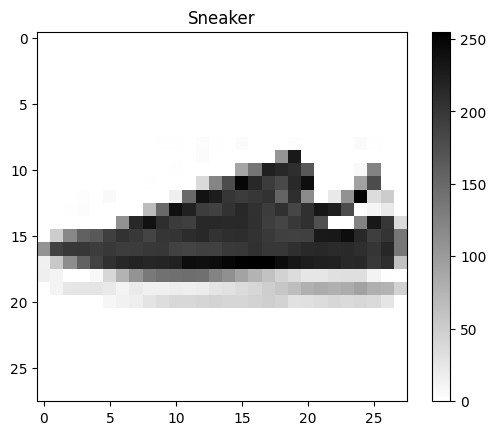

In [73]:
plt.figure()
plt.imshow(viz_train_x[6], cmap=plt.cm.binary)
plt.title(CLASS_NAMES[viz_train_y[6]])
plt.colorbar()
plt.grid(False)
plt.show()

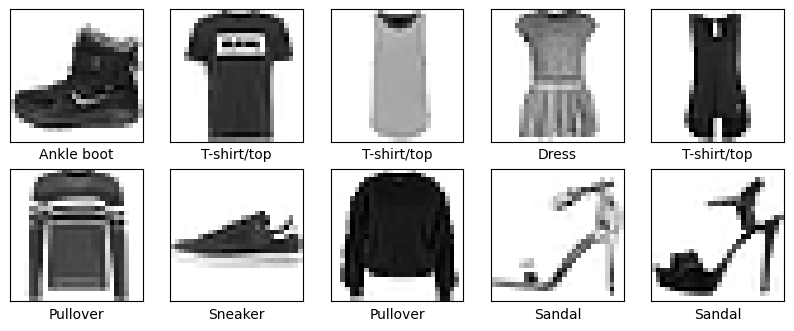

In [74]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(viz_train_x[i], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[viz_train_y[i]])
plt.show()

In [75]:
# Distribution of the labels in the traing dataset with numbers in each class
unique, counts = np.unique(train_y, return_counts=True)
print("Distribuição de frequência das classes do conjunto de treinamento: \n", dict(zip(unique, counts)), "\n")

# Create a DataFrame for plotting
data = {'Class': unique, 'Count': counts}
df = pd.DataFrame(data)

fig = px.bar(df, x='Class', y='Count', text='Count',
             labels={'Count': 'Frequency', 'Class': 'Class'},
             title='Distribution of Labels in Training Dataset',
             width=1000, height=600)

fig.show()

Distribuição de frequência das classes do conjunto de treinamento: 
 {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000} 



In [76]:
# Distribution of the labels in the test dataset with numbers in each class
unique, counts = np.unique(test_y, return_counts=True)
print("Distribuição de frequência das classes do conjunto de teste: \n", dict(zip(unique, counts)), '\n')

# Create a DataFrame for plotting
data = {'Class': unique, 'Count': counts}
df = pd.DataFrame(data)

fig = px.bar(df, x='Class', y='Count', text='Count',
             labels={'Count': 'Frequency', 'Class': 'Class'},
             title='Distribution of Labels in Training Dataset',
             width=1000, height=600)

fig.show()

Distribuição de frequência das classes do conjunto de teste: 
 {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000} 



# Base Models

## Random Forest

In [77]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion = 'entropy',
    max_depth=100,
    random_state=42)

rf_exec_time = base_model_trainer(rf_classifier)

evaluate_base_model(
    'Random Forest',
    rf_classifier,
    rf_exec_time)


Accuracy of Random Forest: 0.8773

Execution time: 98.29899406433105 

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.76      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.96      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix
[[867   0  13  27   4   1  76   0  12   0]
 [  3 964   3  20   4   0   5   0   1   0]
 [ 13   0 798  10 121   0  53   0   5   0]
 

(0.8773,
 array([[867,   0,  13,  27,   4,   1,  76,   0,  12,   0],
        [  3, 964,   3,  20,   4,   0,   5,   0,   1,   0],
        [ 13,   0, 798,  10, 121,   0,  53,   0,   5,   0],
        [ 18,   2,   9, 908,  28,   0,  33,   0,   2,   0],
        [  0,   0,  94,  38, 811,   0,  53,   0,   4,   0],
        [  0,   0,   0,   1,   0, 957,   0,  29,   1,  12],
        [158,   1, 117,  30,  88,   0, 587,   0,  19,   0],
        [  0,   0,   0,   0,   0,  11,   0, 958,   0,  31],
        [  0,   2,   4,   1,   5,   2,   7,   5, 974,   0],
        [  0,   0,   0,   0,   0,   8,   0,  40,   3, 949]]),
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 98.29899406433105,
 [0.587])

## Suport Vector Machine

### Suport Vector Linear Classifier

In [78]:
svm_classifier = SVC(
    kernel='linear',
    random_state=42)


svm_exec_time = base_model_trainer(svm_classifier)

evaluate_base_model('SVCLinear',
                    svm_classifier,
                    svm_exec_time)

Accuracy of SVCLinear: 0.8463

Execution time: 362.34680938720703 

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.77      0.75      1000
           3       0.85      0.84      0.85      1000
           4       0.76      0.77      0.77      1000
           5       0.93      0.94      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.93      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix
[[815   2  13  45   4   1 108   0  12   0]
 [  6 962   2  22   3   0   4   0   1   0]
 [ 22   6 769   8 109   0  79   0   7   0]
 [ 5

(0.8463,
 array([[815,   2,  13,  45,   4,   1, 108,   0,  12,   0],
        [  6, 962,   2,  22,   3,   0,   4,   0,   1,   0],
        [ 22,   6, 769,   8, 109,   0,  79,   0,   7,   0],
        [ 54,  15,  19, 842,  27,   0,  40,   0,   3,   0],
        [  1,   2, 114,  33, 773,   0,  72,   0,   5,   0],
        [  1,   0,   0,   1,   0, 936,   0,  38,   3,  21],
        [174,   2, 122,  30,  93,   0, 562,   0,  17,   0],
        [  0,   0,   0,   0,   0,  38,   0, 934,   1,  27],
        [ 12,   1,   8,   8,   2,  15,  25,   4, 925,   0],
        [  0,   0,   0,   0,   0,  15,   1,  39,   0, 945]]),
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 362.34680938720703,
 [0.587, 0.562])

### Suport Vector Classifier

In [79]:
svm_classifier = SVC(
    kernel='rbf',
    C=10,
    random_state=42)

svm_exec_time = base_model_trainer(svm_classifier)

evaluate_base_model('SVM',
                    svm_classifier,
                    svm_exec_time)

Accuracy of SVM: 0.9002

Execution time: 258.6090292930603 

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.84      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.72      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix
[[853   0  13  21   6   1 100   0   6   0]
 [  3 973   2  17   3   0   2   0   0   0]
 [ 20   3 836   9  74   0  56   0   2   0]
 [ 24   2  

(0.9002,
 array([[853,   0,  13,  21,   6,   1, 100,   0,   6,   0],
        [  3, 973,   2,  17,   3,   0,   2,   0,   0,   0],
        [ 20,   3, 836,   9,  74,   0,  56,   0,   2,   0],
        [ 24,   2,  13, 910,  27,   0,  19,   0,   5,   0],
        [  0,   1,  82,  21, 835,   0,  60,   0,   1,   0],
        [  0,   0,   0,   1,   0, 974,   0,  17,   1,   7],
        [114,   1,  82,  24,  54,   0, 718,   0,   7,   0],
        [  0,   0,   0,   0,   0,  16,   0, 962,   0,  22],
        [  3,   0,   3,   3,   3,   2,   3,   3, 980,   0],
        [  0,   0,   0,   0,   0,   8,   1,  30,   0, 961]]),
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 258.6090292930603,
 [0.587, 0.562, 0.718])

## Decision Tree

In [80]:
dt_classifier = DecisionTreeClassifier(
    random_state=42,
     max_depth = 10,
    splitter='best',
    min_samples_split=2)

dt_exec_time = base_model_trainer(dt_classifier)

evaluate_base_model(
    'Decision tree',
    dt_classifier,
    dt_exec_time)

Accuracy of Decision tree: 0.8008

Execution time: 21.846704244613647 

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.97      0.92      0.95      1000
           2       0.65      0.67      0.66      1000
           3       0.82      0.81      0.82      1000
           4       0.60      0.73      0.66      1000
           5       0.94      0.86      0.90      1000
           6       0.57      0.50      0.53      1000
           7       0.86      0.93      0.90      1000
           8       0.93      0.90      0.91      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000


Confusion Matrix
[[774   3  25  40  12   0 132   1   9   4]
 [ 13 924   4  40   7   0  10   0   1   1]
 [ 13   1 665   8 242   0  62   0   8   1]


(0.8008,
 array([[774,   3,  25,  40,  12,   0, 132,   1,   9,   4],
        [ 13, 924,   4,  40,   7,   0,  10,   0,   1,   1],
        [ 13,   1, 665,   8, 242,   0,  62,   0,   8,   1],
        [ 32,  10,  26, 811,  62,   2,  50,   0,   6,   1],
        [  4,   0, 124,  39, 734,   0,  96,   0,   3,   0],
        [  2,   4,   0,   1,   1, 864,   0,  70,  21,  37],
        [135,   4, 164,  38, 140,   2, 499,   0,  15,   3],
        [  0,   0,   0,   0,   0,  27,   0, 928,   6,  39],
        [  5,   2,  17,  10,  20,   7,  27,   9, 901,   2],
        [  1,   0,   1,   0,   0,  21,   1,  65,   3, 908]]),
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 21.846704244613647,
 [0.587, 0.562, 0.718, 0.499])

## KNN

In [81]:
knn_classifier = KNeighborsClassifier(
    n_neighbors=5,
    algorithm = 'auto',
    weights = 'distance')

knn_exec_time = base_model_trainer(knn_classifier)

evaluate_base_model(
    'KNN',
    knn_classifier,
    knn_exec_time)

Accuracy of KNN: 0.8577

Execution time: 0.02266716957092285 

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.80      0.78      1000
           3       0.91      0.86      0.89      1000
           4       0.79      0.78      0.78      1000
           5       1.00      0.82      0.90      1000
           6       0.64      0.61      0.62      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.96      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion Matrix
[[844   0  17  16   4   0 111   1   7   0]
 [  5 971   4  12   4   0   3   0   1   0]
 [ 22   2 801  11  83   0  81   0   0   0]
 [ 32   5

(0.8577,
 array([[844,   0,  17,  16,   4,   0, 111,   1,   7,   0],
        [  5, 971,   4,  12,   4,   0,   3,   0,   1,   0],
        [ 22,   2, 801,  11,  83,   0,  81,   0,   0,   0],
        [ 32,   5,  13, 864,  40,   0,  43,   0,   3,   0],
        [  1,   1, 106,  23, 779,   0,  88,   0,   2,   0],
        [  1,   0,   0,   0,   0, 820,   5,  93,   1,  80],
        [165,   1, 117,  21,  73,   0, 610,   0,  13,   0],
        [  0,   0,   0,   0,   0,   2,   0, 961,   0,  37],
        [  1,   0,   9,   3,   6,   0,  16,   7, 957,   1],
        [  0,   0,   0,   0,   0,   1,   0,  28,   1, 970]]),
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 0.02266716957092285,
 [0.587, 0.562, 0.718, 0.499, 0.61])

## Logistic Regression

In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42,
                                   C=1,
                                   multi_class= 'ovr',
                                   penalty='l2')

lr_exec_time = base_model_trainer(lr_classifier)

evaluate_base_model(
    'Logistic Regression',
    lr_classifier,
    lr_exec_time)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy of Logistic Regression: 0.8413

Execution time: 26.396975994110107 

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.73      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.72      0.76      0.74      1000
           5       0.94      0.92      0.93      1000
           6       0.64      0.54      0.59      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.95      0.93      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


Confusion Matrix
[[818   3  15  49   6   4  91   0  14   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 732  11 133   0  81   1  11

(0.8413,
 array([[818,   3,  15,  49,   6,   4,  91,   0,  14,   0],
        [  5, 953,   4,  27,   5,   0,   3,   1,   2,   0],
        [ 27,   4, 732,  11, 133,   0,  81,   1,  11,   0],
        [ 27,  16,  14, 867,  34,   0,  37,   0,   5,   0],
        [  0,   4, 117,  39, 755,   0,  74,   0,  11,   0],
        [  2,   0,   0,   1,   0, 918,   0,  50,  11,  18],
        [142,   3, 131,  44, 110,   0, 542,   0,  28,   0],
        [  0,   0,   0,   0,   0,  33,   0, 937,   1,  29],
        [  8,   1,   6,  11,   1,   7,  16,   4, 946,   0],
        [  0,   1,   0,   1,   0,  13,   1,  39,   0, 945]]),
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 26.396975994110107,
 [0.587, 0.562, 0.718, 0.499, 0.61, 0.542])

## GaussianNB

In [83]:
# Naive Bayes classifier GaussianNB
nb_classifier = GaussianNB()

nb_exec_time = base_model_trainer(nb_classifier)

evaluate_base_model('Naive Bayes',
                    nb_classifier,
                    nb_exec_time)

Accuracy of Naive Bayes: 0.5856

Execution time: 0.28972411155700684 

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000


Confusion Matrix
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 

(0.5856,
 array([[586,  64,  29, 162, 110,   0,  20,   0,  29,   0],
        [  1, 939,  14,  36,   7,   0,   1,   0,   2,   0],
        [  7,  14, 324,  65, 545,   0,  23,   0,  22,   0],
        [  9, 387,   6, 545,  43,   0,   4,   0,   6,   0],
        [  0,  34,  44, 131, 779,   0,   4,   0,   8,   0],
        [  0,   0,   1,   1,   0, 278,   3, 660,   5,  52],
        [117,  34, 112, 200, 435,   0,  40,   0,  62,   0],
        [  0,   0,   0,   0,   0,   3,   0, 988,   0,   9],
        [  0,   2,  19,  85, 149,   3,  27,   4, 710,   1],
        [  0,   0,   1,   1,   0,  16,   3, 304,   8, 667]]),
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 0.28972411155700684,
 [0.587, 0.562, 0.718, 0.499, 0.61, 0.542, 0.04])

## AdaBoost

In [84]:
# AdaBoost classifier
ada_classifier = AdaBoostClassifier(
    n_estimators=100,
    random_state=42)

ada_exec_time = base_model_trainer(ada_classifier)
evaluate_base_model(
    'AdaBoost',
    ada_classifier,
    ada_exec_time)

Accuracy of AdaBoost: 0.5928

Execution time: 240.38440442085266 

Classification Report
              precision    recall  f1-score   support

           0       0.47      0.05      0.09      1000
           1       0.91      0.77      0.83      1000
           2       0.34      0.68      0.45      1000
           3       0.60      0.77      0.67      1000
           4       0.54      0.56      0.55      1000
           5       0.82      0.60      0.70      1000
           6       0.24      0.18      0.21      1000
           7       0.55      0.94      0.70      1000
           8       0.93      0.85      0.89      1000
           9       0.89      0.52      0.66      1000

    accuracy                           0.59     10000
   macro avg       0.63      0.59      0.57     10000
weighted avg       0.63      0.59      0.57     10000


Confusion Matrix
[[ 51  21 371 150  33   0 365   0   8   1]
 [  5 766  13 200   8   0   8   0   0   0]
 [  9   2 678  11 216   0  80   0   4   0]
 [  4

(0.5928,
 array([[ 51,  21, 371, 150,  33,   0, 365,   0,   8,   1],
        [  5, 766,  13, 200,   8,   0,   8,   0,   0,   0],
        [  9,   2, 678,  11, 216,   0,  80,   0,   4,   0],
        [  4,  37, 124, 771,  50,   1,  12,   0,   1,   0],
        [  3,   3, 323,  53, 565,   0,  51,   0,   2,   0],
        [  0,   0,   0,   1,   0, 605,   0, 325,  16,  53],
        [ 27,  15, 486, 101, 164,   0, 185,   0,  22,   0],
        [  0,   0,   0,   0,   0,  54,   0, 937,   3,   6],
        [ 10,   1,  11,   6,  13,   8,  70,  28, 851,   2],
        [  0,   0,   0,   0,   0,  72,   0, 400,   9, 519]]),
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 240.38440442085266,
 [0.587, 0.562, 0.718, 0.499, 0.61, 0.542, 0.04, 0.051])

## Base Models Comparative Analysis

In [85]:
# Create a dataframe to store the results of the base models and their execution time and accuracy and print it out in a table
results = pd.DataFrame({'Base Model': MODELS_LISTS, 'Accuracy': ACCURACIES, 'Execution Time(s)': [f"{time:.4f}" for time in EXECUTION_TIMES]})
print(results)


            Base Model  Accuracy Execution Time(s)
0        Random Forest    0.8773           98.2990
1            SVCLinear    0.8463          362.3468
2                  SVM    0.9002          258.6090
3        Decision tree    0.8008           21.8467
4                  KNN    0.8577            0.0227
5  Logistic Regression    0.8413           26.3970
6          Naive Bayes    0.5856            0.2897
7             AdaBoost    0.5928          240.3844


In [86]:
results = results.sort_values(by='Accuracy', ascending=False)

# Bar plot using Plotly Express
fig = px.bar(
    results,
    x='Base Model',
    y='Accuracy',
    color='Base Model',
    text='Accuracy',
    title='Model Accuracy Comparison',
    labels={'Accuracy': 'Accuracy'},
    height=700
)

# Add accuracy values on top of each bar
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')

# Customize layout
fig.update_layout(
    xaxis_title='Base Models',
    yaxis_title='Accuracy',
    xaxis_tickangle=0,
    bargap=0.2,
    hovermode='x',
)

# Show the plot
fig.show()

In [87]:
#Convert 'Execution Time(s)' to numeric for sorting
results['Execution Time(s)'] = pd.to_numeric(results['Execution Time(s)'])

# Sort the dataframe by 'Execution Time(s)'
results = results.sort_values(by='Execution Time(s)', ascending=False)

# Bar plot using Plotly Express
fig = px.bar(
    results,
    x='Base Model',
    y='Execution Time(s)',
    color='Base Model',
    text='Execution Time(s)',
    title='Execution time comparasion',
    labels={'Execution Time(s)': 'Seconds'},
    height=700
)

# Add time values on top of each bar
fig.update_traces(texttemplate='%{text:.2f} seconds', textposition='outside')

# Customize layout
fig.update_layout(
    xaxis_title='Base Model',
    yaxis_title='Execution Time (s)',
    xaxis_tickangle=0,
    bargap=0.2,
    hovermode='x',
)

# Show the plot
fig.show()

# Data preparation for DL

In [90]:
import torchvision.transforms as transforms

# Transformações para normalização adicional (média e desvio padrão)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Carregamento do conjunto de dados com transformação
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Carregamento dos dados
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Extraindo um batch de dados para exemplos
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Verificando a forma dos dados
print(images.shape)  # Saída: torch.Size([64, 1, 28, 28]) - (número de amostras, canais, altura, largura)

# Normalizando os rótulos
train_y = train_dataset.targets
test_y = test_dataset.targets


torch.Size([64, 1, 28, 28])


In [91]:
# prepare the data for training a MLP model

train_data_tensor = torch.tensor(train_x, dtype=torch.float)
train_labels_tensor = torch.tensor(train_y, dtype=torch.long)
test_data_tensor = torch.tensor(test_x, dtype=torch.float)
test_labels_tensor = torch.tensor(test_y, dtype=torch.long)

# Reshape the data
train_data_tensor = train_data_tensor.reshape(-1, 1, 28, 28)
test_data_tensor = test_data_tensor.reshape(-1, 1, 28, 28)

# Create a dataset and a data loader
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

<ipython-input-91-1f900c9c747f>:3: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-91-1f900c9c747f>:4: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-91-1f900c9c747f>:5: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-91-1f900c9c747f>:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



# Multilayer Perceptron

In [92]:
mlp_model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),  # Additional dense layer with 256 neurons
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(512, 256),  # Original dense layer with 128 neurons
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(128, 64),
    torch.nn.Linear(64, 10),

    torch.nn.Softmax(dim=1)
)


# Move the model to GPU
mlp_model = mlp_model.to(DEVICE)
test_data_tensor = test_data_tensor.to(DEVICE)
test_labels_tensor = test_labels_tensor.to(DEVICE)


# Define the loss function and optimizer and metrics
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.001, weight_decay=0.0001)
metrics = ['accuracy']
num_epochs = 10

In [93]:
start_time =  time.time()

for epoch in range(num_epochs):
    for inputs, labels in train_loader:

        optimizer.zero_grad()  # Zero the gradients
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)  # Move data to GPU
        outputs = mlp_model(inputs)  # Forward pass
        loss = loss_fn(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
end_time = time.time()
exec_time = end_time - start_time

# Evaluate the model on the test dataset
mlp_model.eval()
with torch.no_grad():
    outputs = mlp_model(test_data_tensor)
    _, predicted = torch.max(outputs.data, 1)
    total = test_labels_tensor.size(0)
    correct = (predicted == test_labels_tensor).sum().item()
    accuracy = correct / total
    print(f'Accuracy of the model on the test dataset: {accuracy}')

Epoch 1/10, Loss: 1.7624932527542114
Epoch 2/10, Loss: 1.787207841873169
Epoch 3/10, Loss: 1.6175637245178223
Epoch 4/10, Loss: 1.6176005601882935
Epoch 5/10, Loss: 1.5549015998840332
Epoch 6/10, Loss: 1.617629885673523
Epoch 7/10, Loss: 1.6175041198730469
Epoch 8/10, Loss: 1.6277480125427246
Epoch 9/10, Loss: 1.5236717462539673
Epoch 10/10, Loss: 1.6851483583450317
Accuracy of the model on the test dataset: 0.8223


In [117]:
# Print the classification report and confusion matrix
print('Classification Report')
print(classification_report(test_labels_tensor.cpu(), predicted.cpu()))

print('\nConfusion Matrix')
print(confusion_matrix(test_labels_tensor.cpu(), predicted.cpu()))

# Print the execution time
print(f'\nExecution time: {exec_time} seconds')

# Print true positive rate for each class
TPR = confusion_matrix(test_labels_tensor.cpu(), predicted.cpu()).diagonal() / confusion_matrix(test_labels_tensor.cpu(), predicted.cpu()).sum(axis=1)
print('\nTrue Positive Rate')
print(f'TPR: {TPR}')

# Print the most difficult class with the class number and name
most_difficult_class = TPR.argmin()
print(f'\nThe most difficult class is {most_difficult_class} - {CLASS_NAMES[most_difficult_class]}')


MODELS_LISTS.append('MLP')
ACCURACIES.append(accuracy)
EXECUTION_TIMES.append(exec_time)
MOST_DIFFICULT_CLASS.append(TPR.argmin())
TPR_MIN.append(TPR.min())

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.88      0.87      1000
           3       0.88      0.94      0.91      1000
           4       0.87      0.84      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.72      0.73      1000
           7       0.94      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Confusion Matrix
[[848   1  23  23   4   0  95   0   6   0]
 [  0 988   1   9   1   0   0   0   1   0]
 [ 11   1 875   9  49   0  55   0   0   0]
 [ 11   8   6 940  14   0  20   0   1   0]
 [  0   2  51  37 842   0  67

# Convolutional network

In [95]:
# convolutional neural network
cnn_model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size=3, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    torch.nn.Conv2d(64, 128, kernel_size=3, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    torch.nn.Flatten(),

    torch.nn.Linear(128 * (28 // 8) * (28 // 8), 10),  # Adjust the input size
    torch.nn.ReLU(),
    torch.nn.Linear(10, 10)  # No activation function needed for the last linear layer
)


In [96]:
# Move the model to GPU
cnn_model = cnn_model.to(DEVICE)

# Define the loss function and optimizer and metrics
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=0.0001)
metrics = ['accuracy']
num_epochs = 10
start_time = time.time()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)  # Move data to GPU
        outputs = cnn_model(inputs)  # Forward pass
        loss = loss_fn(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

end_time = time.time()
exec_time = end_time - start_time
# Evaluate the model on the test dataset
cnn_model.eval()
with torch.no_grad():
    outputs = cnn_model(test_data_tensor)
    _, predicted = torch.max(outputs.data, 1)
    total = test_labels_tensor.size(0)
    correct = (predicted == test_labels_tensor).sum().item()
    accuracy = correct / total
    print(f'Accuracy of the model on the test dataset: {accuracy}')


Epoch 1/10, Loss: 0.19618329405784607
Epoch 2/10, Loss: 0.22630462050437927
Epoch 3/10, Loss: 0.5854358077049255
Epoch 4/10, Loss: 0.06816484034061432
Epoch 5/10, Loss: 0.3152962028980255
Epoch 6/10, Loss: 0.6948695182800293
Epoch 7/10, Loss: 0.3434588313102722
Epoch 8/10, Loss: 0.205098494887352
Epoch 9/10, Loss: 0.16267217695713043
Epoch 10/10, Loss: 0.22263193130493164
Accuracy of the model on the test dataset: 0.9111


In [118]:
# Print the classification report and confusion matrix
print('Classification Report')
print(classification_report(test_labels_tensor.cpu(), predicted.cpu()))

print('\nConfusion Matrix')
print(confusion_matrix(test_labels_tensor.cpu(), predicted.cpu()))

# Print the execution time
print(f'\nExecution time: {exec_time} seconds')

# Print true positive rate for each class
TPR = confusion_matrix(test_labels_tensor.cpu(), predicted.cpu()).diagonal() / confusion_matrix(test_labels_tensor.cpu(), predicted.cpu()).sum(axis=1)
print('\nTrue Positive Rate')
print(f'TPR: {TPR}')

# Print the most difficult class with the class number and name
most_difficult_class = TPR.argmin()
print(f'\nThe most difficult class is {most_difficult_class} - {CLASS_NAMES[most_difficult_class]}')


MODELS_LISTS.append('CNN_model')
ACCURACIES.append(accuracy)
EXECUTION_TIMES.append(exec_time)
MOST_DIFFICULT_CLASS.append(TPR.argmin())
TPR_MIN.append(TPR.min())

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.88      0.87      1000
           3       0.88      0.94      0.91      1000
           4       0.87      0.84      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.72      0.73      1000
           7       0.94      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Confusion Matrix
[[848   1  23  23   4   0  95   0   6   0]
 [  0 988   1   9   1   0   0   0   1   0]
 [ 11   1 875   9  49   0  55   0   0   0]
 [ 11   8   6 940  14   0  20   0   1   0]
 [  0   2  51  37 842   0  67

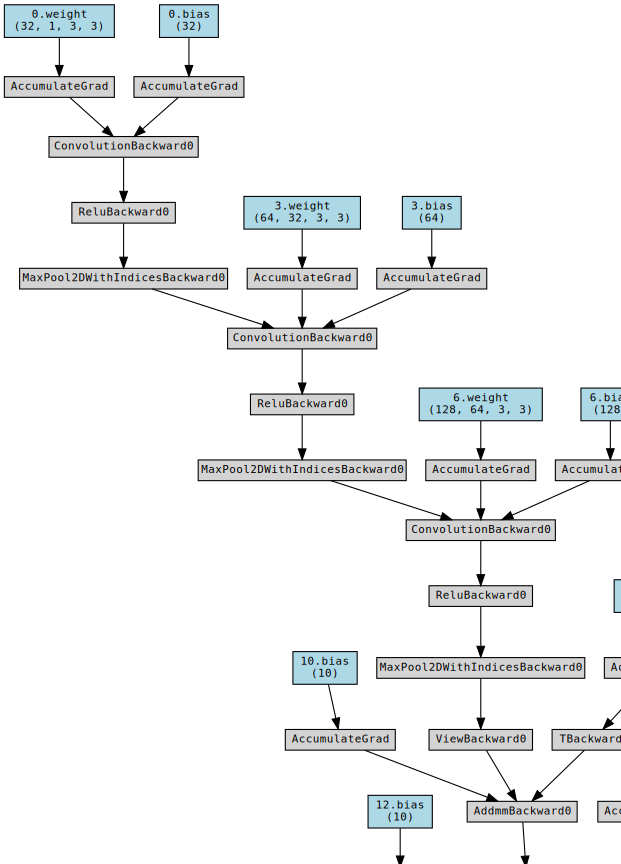

In [98]:
# Diagram of the model architecture using torchviz
from torchviz import make_dot
x = torch.randn(1, 1, 28, 28)
x = x.to(DEVICE)
y = cnn_model(x)
dot = make_dot(y, params=dict(list(cnn_model.named_parameters()) + [('x', x)]))
dot

In [99]:
dot.render('cnn_model_diagram', format='png')

'cnn_model_diagram.png'

# Transfer learning models

Observação: Decidi por utilizar Keras (TensorFlow back-end) para utilizar o modelos pré-treinados devido a sua documentação mais extensa e afins.

## Downloading the dataset

In [100]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Data preparation

In [101]:
max_limit = 1200
train_indices = np.random.choice(len(x_train), max_limit, replace=False)
test_indices = np.random.choice(len(x_test), max_limit, replace=False)

x_train = x_train[train_indices]
y_train = y_train[train_indices]

x_test = x_test[test_indices]
y_test = y_test[test_indices]

In [102]:
x_train = tf.expand_dims(x_train, axis = -1)
x_test = tf.expand_dims(x_test, axis = -1)

x_train = tf.concat( [x_train, x_train, x_train], axis = -1)
x_test = tf.concat( [x_test, x_test, x_test], axis = -1)

# One hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [103]:
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

## Neural networks functions


In [ ]:
def neural_network_trainer (model, batch_size = 128, epochs = 20):
    start_time = time.time()

    model.fit(x_train, y_train, batch_size =  batch_size, epochs = epochs)
    end_time =  time.time()
    execution_time =  end_time - start_time

    return execution_time

def evaluate_neural_network(name, model, execution_time):
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis =1)
    accuracy = accuracy_score(np.argmax(y_test, axis = 1), y_pred)
    print(f'Accuracy: {accuracy:.4f} \n')

    confusionMatrix = confusion_matrix(np.argmax(y_test, axis = 1), y_pred)
    print('Classification Report')
    print(classification_report(np.argmax(y_test, axis = 1), y_pred))

    print('Confusion Matrix:')
    print(confusionMatrix)
    print(f'Exec time: {execution_time}')

    TPR = confusionMatrix.diagonal() / confusionMatrix.sum(axis = 1)
    print('True POsitive Rate')
    print(TPR)

    MODELS_LISTS.append(name)
    ACCURACIES.append(accuracy)
    EXECUTION_TIMES.append(execution_time)
    MOST_DIFFICULT_CLASS.append(TPR.argmin())
    TPR_MIN.append(TPR.min())

## VGG

In [ ]:
# Load VGG16 model from pytorch hub and set the pretrained parameter to True to load the pretrained weights for the model from ImageNet
vgg16_model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
# Print the model architecture
print(vgg16_model)

# Evaluate the model on the test dataset using the neural network trainer function
execution_time = neural_network_trainer(vgg16_model, batch_size=128, epochs=20)
evaluate_neural_network('VGG16', vgg16_model, execution_time)

### VGG16

In [105]:
# Load VGG16 base model
vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the VGG16 base model
for layer in vgg16_base.layers:
    layer.trainable = False

# Create a Sequential model
modelVGG16 = Sequential()

# Add the VGG16 base model to the Sequential model
modelVGG16.add(vgg16_base)

# Add GlobalAveragePooling2D layer
modelVGG16.add(GlobalAveragePooling2D())

# Add Dense layer with softmax activation for classification
modelVGG16.add(Dense(512, activation='relu'))

modelVGG16.add(layers.Dropout(0.2))

modelVGG16.add(Dense(256, activation = 'relu'))

modelVGG16.add(layers.Dropout(0.2))

modelVGG16.add(Dense(128, activation = 'relu'))

modelVGG16.add(Dense(64, activation = 'relu'))

modelVGG16.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
modelVGG16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and evaluate the model
execution_time = neural_network_trainer(modelVGG16)
evaluate_neural_network('VGG16', modelVGG16, execution_time)


Epoch 1/10
8/8 [==============================] - 2s 87ms/step - loss: 2.1467 - accuracy: 0.3080
Epoch 2/10
8/8 [==============================] - 1s 83ms/step - loss: 1.2592 - accuracy: 0.5950
Epoch 3/10
8/8 [==============================] - 1s 84ms/step - loss: 0.8996 - accuracy: 0.6910
Epoch 4/10
8/8 [==============================] - 1s 84ms/step - loss: 0.6836 - accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 82ms/step - loss: 0.6263 - accuracy: 0.7810
Epoch 6/10
8/8 [==============================] - 1s 84ms/step - loss: 0.4992 - accuracy: 0.8210
Epoch 7/10
8/8 [==============================] - 1s 82ms/step - loss: 0.4429 - accuracy: 0.8390
Epoch 8/10
8/8 [==============================] - 1s 82ms/step - loss: 0.3759 - accuracy: 0.8660
Epoch 9/10
8/8 [==============================] - 1s 82ms/step - loss: 0.3272 - accuracy: 0.8890
Epoch 10/10
32/32 [==============================] - 1s 22ms/step
Accuracy: 0.7850 

Classification Report
              precis

### VGG19

In [106]:
# Load VGG16 base model
vgg19_base = VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the VGG16 base model
for layer in vgg19_base.layers:
    layer.trainable = False

# Create a Sequential model
modelVGG19 = Sequential()

# Add the VGG16 base model to the Sequential model
modelVGG19.add(vgg19_base)

# Add GlobalAveragePooling2D layer
modelVGG19.add(GlobalAveragePooling2D())

# Add Dense layer with softmax activation for classification
modelVGG19.add(Dense(512, activation='relu'))

modelVGG19.add(layers.Dropout(0.2))

modelVGG19.add(Dense(256, activation = 'relu'))

modelVGG19.add(layers.Dropout(0.2))

modelVGG19.add(Dense(128, activation = 'relu'))

modelVGG19.add(Dense(64, activation = 'relu'))

modelVGG19.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
modelVGG19.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and evaluate the model
execution_time = neural_network_trainer(modelVGG19)
evaluate_neural_network('VGG19', modelVGG19, execution_time)

Epoch 1/10
8/8 [==============================] - 3s 95ms/step - loss: 2.2246 - accuracy: 0.2940
Epoch 2/10
8/8 [==============================] - 1s 95ms/step - loss: 1.0898 - accuracy: 0.6220
Epoch 3/10
8/8 [==============================] - 1s 95ms/step - loss: 0.7594 - accuracy: 0.7180
Epoch 4/10
8/8 [==============================] - 1s 95ms/step - loss: 0.5898 - accuracy: 0.7840
Epoch 5/10
8/8 [==============================] - 1s 95ms/step - loss: 0.5395 - accuracy: 0.8120
Epoch 6/10
8/8 [==============================] - 1s 99ms/step - loss: 0.4342 - accuracy: 0.8300
Epoch 7/10
8/8 [==============================] - 1s 93ms/step - loss: 0.4039 - accuracy: 0.8400
Epoch 8/10
8/8 [==============================] - 1s 94ms/step - loss: 0.3447 - accuracy: 0.8840
Epoch 9/10
8/8 [==============================] - 1s 93ms/step - loss: 0.2951 - accuracy: 0.8920
Epoch 10/10
32/32 [==============================] - 1s 25ms/step
Accuracy: 0.8290 

Classification Report
              precis

## ResNet

### ResNet 50

In [107]:
resnet50_base = ResNet50(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

for layer in resnet50_base.layers:
  layer.trainable = False

modelResNet50 = Sequential()
modelResNet50.add(resnet50_base)
modelResNet50.add(GlobalAveragePooling2D())
modelResNet50.add(Dense(512, activation = 'relu'))
modelResNet50.add(layers.Dropout(0.2))

modelResNet50.add(Dense(256, activation = 'relu'))

modelResNet50.add(layers.Dropout(0.2))

modelResNet50.add(Dense(128, activation = 'relu'))

modelResNet50.add(Dense(64, activation = 'relu'))

modelResNet50.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
modelResNet50.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and evaluate the model
execution_time = neural_network_trainer(modelResNet50)
evaluate_neural_network('ResNet50', modelResNet50, execution_time)



Epoch 1/10
8/8 [==============================] - 6s 83ms/step - loss: 1.8051 - accuracy: 0.3640
Epoch 2/10
8/8 [==============================] - 1s 81ms/step - loss: 0.8671 - accuracy: 0.7050
Epoch 3/10
8/8 [==============================] - 1s 78ms/step - loss: 0.6705 - accuracy: 0.7490
Epoch 4/10
8/8 [==============================] - 1s 78ms/step - loss: 0.5073 - accuracy: 0.8240
Epoch 5/10
8/8 [==============================] - 1s 78ms/step - loss: 0.4661 - accuracy: 0.8340
Epoch 6/10
8/8 [==============================] - 1s 80ms/step - loss: 0.3690 - accuracy: 0.8710
Epoch 7/10
8/8 [==============================] - 1s 78ms/step - loss: 0.3129 - accuracy: 0.8930
Epoch 8/10
8/8 [==============================] - 1s 78ms/step - loss: 0.2674 - accuracy: 0.9010
Epoch 9/10
8/8 [==============================] - 1s 77ms/step - loss: 0.2570 - accuracy: 0.9070
Epoch 10/10
32/32 [==============================] - 2s 21ms/step
Accuracy: 0.8250 

Classification Report
              precis

### ResNet 152V2

In [108]:
resnet152v2_base = ResNet152V2(include_top = False, weights='imagenet', input_shape = (224, 224, 3))

for layer in resnet152v2_base.layers:
  layer.trainable = False

modelResNet152 = Sequential()
modelResNet152.add(resnet152v2_base)
modelResNet152.add(GlobalAveragePooling2D())
modelResNet152.add(Dense(512, activation = 'relu'))
modelResNet152.add(layers.Dropout(0.2))
modelResNet152.add(Dense(256, activation = 'relu'))
modelResNet152.add(layers.Dropout(0.2))
modelResNet152.add(Dense(128, activation = 'relu'))
modelResNet152.add(Dense(64, activation = 'relu'))
modelResNet152.add(layers.Dense(10, activation = 'softmax'))

modelResNet152.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

execution_time = neural_network_trainer(modelResNet152)
evaluate_neural_network('ResNet152', modelResNet152, execution_time)

Epoch 1/10
8/8 [==============================] - 11s 168ms/step - loss: 132.7547 - accuracy: 0.1190
Epoch 2/10
8/8 [==============================] - 1s 170ms/step - loss: 41.7627 - accuracy: 0.1260
Epoch 3/10
8/8 [==============================] - 1s 169ms/step - loss: 17.8437 - accuracy: 0.1410
Epoch 4/10
8/8 [==============================] - 1s 170ms/step - loss: 8.8929 - accuracy: 0.1300
Epoch 5/10
8/8 [==============================] - 1s 166ms/step - loss: 4.4638 - accuracy: 0.1680
Epoch 6/10
8/8 [==============================] - 1s 166ms/step - loss: 2.8881 - accuracy: 0.1970
Epoch 7/10
8/8 [==============================] - 1s 170ms/step - loss: 2.2758 - accuracy: 0.2460
Epoch 8/10
8/8 [==============================] - 1s 168ms/step - loss: 2.0457 - accuracy: 0.2720
Epoch 9/10
8/8 [==============================] - 1s 166ms/step - loss: 1.9709 - accuracy: 0.2880
Epoch 10/10
32/32 [==============================] - 4s 48ms/step
Accuracy: 0.3850 

Classification Report
      

## GoogLeNet (InceptionV3)

In [109]:
modelgooglenet_base = InceptionV3(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

for layer in modelgooglenet_base.layers:
  layer. trainable = False

modelInceptionV3 = Sequential()
modelInceptionV3.add(modelgooglenet_base)
modelInceptionV3.add(GlobalAveragePooling2D())
modelInceptionV3.add(Dense(512, activation = 'relu'))
modelInceptionV3.add(layers.Dropout(0.2))
modelInceptionV3.add(Dense(256, activation = 'relu'))
modelInceptionV3.add(layers.Dropout(0.2))
modelInceptionV3.add(Dense(128, activation = 'relu'))
modelInceptionV3.add(Dense(64, activation = 'relu'))
modelInceptionV3.add(layers.Dense(10, activation = 'softmax'))

modelInceptionV3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

execution_time = neural_network_trainer(modelInceptionV3)
evaluate_neural_network('InceptionV3', modelInceptionV3, execution_time)


Epoch 1/10
8/8 [==============================] - 6s 57ms/step - loss: 17.1918 - accuracy: 0.1530
Epoch 2/10
8/8 [==============================] - 0s 59ms/step - loss: 5.0400 - accuracy: 0.2930
Epoch 3/10
8/8 [==============================] - 0s 60ms/step - loss: 3.5315 - accuracy: 0.3000
Epoch 4/10
8/8 [==============================] - 0s 55ms/step - loss: 2.3833 - accuracy: 0.3440
Epoch 5/10
8/8 [==============================] - 0s 55ms/step - loss: 2.0036 - accuracy: 0.3840
Epoch 6/10
8/8 [==============================] - 0s 55ms/step - loss: 1.6739 - accuracy: 0.4470
Epoch 7/10
8/8 [==============================] - 0s 57ms/step - loss: 1.5433 - accuracy: 0.4650
Epoch 8/10
8/8 [==============================] - 0s 57ms/step - loss: 1.4389 - accuracy: 0.5000
Epoch 9/10
8/8 [==============================] - 0s 54ms/step - loss: 1.3450 - accuracy: 0.4990
Epoch 10/10
32/32 [==============================] - 2s 16ms/step
Accuracy: 0.6310 

Classification Report
              preci

## DenseNet

### DenseNet121

In [110]:
densenet121_base = DenseNet121(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

for layer in densenet121_base.layers:
  layer.trainable = False


modelDenseNet121 = Sequential()
modelDenseNet121.add(densenet121_base)
modelDenseNet121.add(GlobalAveragePooling2D())
modelDenseNet121.add(Dense(512, activation = 'relu'))
modelDenseNet121.add(layers.Dropout(0.2))
modelDenseNet121.add(Dense(256, activation = 'relu'))
modelDenseNet121.add(layers.Dropout(0.2))
modelDenseNet121.add(Dense(128, activation = 'relu'))
modelDenseNet121.add(Dense(64, activation = 'relu'))
modelDenseNet121.add(layers.Dense(10, activation = 'softmax'))

modelDenseNet121.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

execution_time = neural_network_trainer(modelDenseNet121)
evaluate_neural_network('DenseNet121', modelDenseNet121, execution_time)

Epoch 1/10
8/8 [==============================] - 8s 88ms/step - loss: 3.4272 - accuracy: 0.1470
Epoch 2/10
8/8 [==============================] - 1s 85ms/step - loss: 2.0500 - accuracy: 0.2620
Epoch 3/10
8/8 [==============================] - 1s 85ms/step - loss: 1.6652 - accuracy: 0.3780
Epoch 4/10
8/8 [==============================] - 1s 84ms/step - loss: 1.4657 - accuracy: 0.4400
Epoch 5/10
8/8 [==============================] - 1s 88ms/step - loss: 1.3087 - accuracy: 0.5130
Epoch 6/10
8/8 [==============================] - 1s 86ms/step - loss: 1.1793 - accuracy: 0.5560
Epoch 7/10
8/8 [==============================] - 1s 84ms/step - loss: 1.1046 - accuracy: 0.5940
Epoch 8/10
8/8 [==============================] - 1s 84ms/step - loss: 0.9998 - accuracy: 0.6300
Epoch 9/10
8/8 [==============================] - 1s 84ms/step - loss: 0.9682 - accuracy: 0.6540
Epoch 10/10
32/32 [==============================] - 3s 26ms/step
Accuracy: 0.6790 

Classification Report
              precis

### DenseNet201

In [111]:
densenet201_base = DenseNet201(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

for layer in densenet121_base.layers:
  layer.trainable = False


modelDenseNet201 = Sequential()
modelDenseNet201.add(densenet201_base)
modelDenseNet201.add(GlobalAveragePooling2D())
modelDenseNet201.add(Dense(512, activation = 'relu'))
modelDenseNet201.add(layers.Dropout(0.2))
modelDenseNet201.add(Dense(256, activation = 'relu'))
modelDenseNet201.add(layers.Dropout(0.2))
modelDenseNet201.add(Dense(128, activation = 'relu'))
modelDenseNet201.add(Dense(64, activation = 'relu'))
modelDenseNet201.add(layers.Dense(10, activation = 'softmax'))

modelDenseNet201.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

execution_time = neural_network_trainer(modelDenseNet201)
evaluate_neural_network('DenseNet201', modelDenseNet201, execution_time)

Epoch 1/10
8/8 [==============================] - 96s 339ms/step - loss: 1.5718 - accuracy: 0.4630
Epoch 2/10
8/8 [==============================] - 3s 337ms/step - loss: 0.6246 - accuracy: 0.7850
Epoch 3/10
8/8 [==============================] - 3s 339ms/step - loss: 0.5423 - accuracy: 0.8110
Epoch 4/10
8/8 [==============================] - 3s 338ms/step - loss: 0.4677 - accuracy: 0.8440
Epoch 5/10
8/8 [==============================] - 3s 338ms/step - loss: 0.3537 - accuracy: 0.8730
Epoch 6/10
8/8 [==============================] - 3s 337ms/step - loss: 0.2816 - accuracy: 0.9090
Epoch 7/10
8/8 [==============================] - 3s 339ms/step - loss: 0.2678 - accuracy: 0.9060
Epoch 8/10
8/8 [==============================] - 3s 340ms/step - loss: 0.2046 - accuracy: 0.9380
Epoch 9/10
8/8 [==============================] - 3s 336ms/step - loss: 0.1307 - accuracy: 0.9540
Epoch 10/10
32/32 [==============================] - 4s 39ms/step
Accuracy: 0.6580 

Classification Report
          

# Comparative analysis

In [121]:
# Create a dataframe to store the results of the base models and their execution time and accuracy and print it out in a table
results = pd.DataFrame({'Model': MODELS_LISTS, 'Accuracy': ACCURACIES, 'Execution Time(s)': [f"{time:.4f}" for time in EXECUTION_TIMES]})
print(results)


results = results.sort_values(by='Accuracy', ascending=False)

# Bar plot using Plotly Express
fig = px.bar(
    results,
    x='Model',
    y='Accuracy',
    color='Model',
    text='Accuracy',
    title='Model Accuracy Comparison',
    labels={'Accuracy': 'Accuracy'},
    height=700
)

# Add accuracy values on top of each bar
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')

# Customize layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Accuracy',
    xaxis_tickangle=0,
    bargap=0.2,
    hovermode='x',
)

# Show the plot
fig.show()

                  Model  Accuracy Execution Time(s)
0         Random Forest    0.8773           98.2990
1             SVCLinear    0.8463          362.3468
2                   SVM    0.9002          258.6090
3         Decision tree    0.8008           21.8467
4                   KNN    0.8577            0.0227
5   Logistic Regression    0.8413           26.3970
6           Naive Bayes    0.5856            0.2897
7              AdaBoost    0.5928          240.3844
8                 VGG16    0.7850            8.5534
9                 VGG19    0.8290            9.5304
10             ResNet50    0.8250           12.0556
11            ResNet152    0.3850           22.9346
12          InceptionV3    0.6310            9.7400
13          DenseNet121    0.6790           13.7981
14          DenseNet201    0.6580          121.0056
15                  MLP    0.9111           27.8681
16            CNN_model    0.9111           27.8681


In [122]:
#Convert 'Execution Time(s)' to numeric for sorting
results['Execution Time(s)'] = pd.to_numeric(results['Execution Time(s)'])

# Sort the dataframe by 'Execution Time(s)'
results = results.sort_values(by='Execution Time(s)', ascending=False)

# Bar plot using Plotly Express
fig = px.bar(
    results,
    x='Model',
    y='Execution Time(s)',
    color='Model',
    text='Execution Time(s)',
    title='Execution time comparasion',
    labels={'Execution Time(s)': 'Seconds'},
    height=700
)

# Add time values on top of each bar
fig.update_traces(texttemplate='%{text:.2f} seconds', textposition='outside')

# Customize layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Execution Time (s)',
    xaxis_tickangle=0,
    bargap=0.2,
    hovermode='x',
)

# Show the plot
fig.show()

In [ ]:
# Plot the TPR min for each model
fig = px.bar(
    results,
    x='Model',
    y='TPR min',
    color='Model',
    text='TPR min',
    title='TPR min comparasion',
    labels={'TPR min': 'TPR min'},
    height=700
)

# Customize layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='TPR_min',
    xaxis_tickangle=0,
    bargap=0.2,
    hovermode='x',
)
fig.show()

In [ ]:
# Plot the most difficult class for each model
fig = px.bar(
    results,
    x='Model',
    y='Most difficult class',
    color='Model',
    text='Most difficult class',
    title='Most difficult class comparasion',
    labels={'Most difficult class': 'Most difficult class'},
    height=700
)

# Customize layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Most difficult class',
    xaxis_tickangle=0,
    bargap=0.2,
    hovermode='x',
)

# Show the plot
fig.show()

In [ ]:
# Plot a piechart for the most difficult class for each model
fig = px.pie(
    results,
    values='Most difficult class',
    names='Model',
    title='Most difficult class comparasion'
)

# Show the plot
fig.show()

## Conclusões

1. **Base models:**
   - Árvore de Decisão: Obteve uma precisão de 80,08% com um tempo de execução relativamente baixo de 21,85 segundos.
   - Random Forest: Superou a Árvore de Decisão com uma precisão de 87,73%, mas levou mais tempo para executar (98,30 segundos).
   - SVM: Alcançou a maior precisão entre os modelos base (90,02%), mas com um tempo de execução moderado de 258,61 segundos.
   - KNN: Alcançou um bom equilíbrio entre precisão (85,77%) e um tempo de execução muito baixo (0,02 segundos).
   - Regressão Logística: Mostrou uma precisão decente (84,13%) e um tempo de execução razoável de 26,40 segundos.
   - Naive Bayes: A menor precisão entre os modelos base (58,56%), mas executou muito rápido (0,29 segundos).
   - AdaBoost: Semelhante ao Naive Bayes em termos de precisão (59,28%), mas demorou significativamente mais (240,38 segundos).

2. **Redes Neurais Convolucionais (CNNs):**
   - VGG16: Obteve uma precisão de 78,50% com um tempo de execução relativamente baixo de 8,55 segundos.
   - VGG19: Melhorou ligeiramente a precisão em comparação com a VGG16 (82,90%)e  com um tempo de execução semelhante (9,53 segundos).
   - ResNet50: Alcançou uma precisão competitiva de 82,50% com um tempo de execução moderado de 12,06 segundos.
   - ResNet152: Menor precisão (38,50%) em comparação com outras CNNs e um tempo de execução mais longo (22,93 segundos).
   - InceptionV3: Precisão moderada (63,10%) e tempo de execução moderado (9,74 segundos).
   - DenseNet121: Alcançou um bom equilíbrio com uma precisão de 67,90% e um tempo de execução moderado de 13,80 segundos.
   - DenseNet201: Precisão ligeiramente menor (65,80%) em comparação com a DenseNet121, mas com um tempo de execução mais longo (121,01 segundos).

3. **MLP e CNN:**
   - MLP: Obteve a maior precisão entre todos os modelos (91,11%) com um tempo de execução razoável de 27,87 segundos.
   - CNN_model: Obteve a mesma precisão e tempo de execução do modelo MLP.

**Resumo Geral:**
- Entre os modelos base, o SVM alcançou a maior precisão, enquanto o KNN demonstrou um bom equilíbrio entre precisão e tempo de execução.
- CNNs geralmente se saíram bem, com VGG19 e ResNet50 sendo escolhas competitivas.
- O MLP superou outros modelos, alcançando a maior precisão com um tempo de execução razoável.

Considerações para a Seleção do Modelo:
- Se houver uma compensação entre precisão e tempo de execução, o KNN pode ser uma boa escolha.
- CNNs como VGG19 e ResNet50 se saíram bem na análise.
- Em relação ao tempo e a precisão, o CNN model ou MLP se mostram as melhores opções neste cenário.

A escolha final depende de requisitos específicos, como a importância da precisão, os recursos computacionais disponíveis e a compensação entre precisão e tempo de execução.